In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load merged dataframe from data folder
merged_df = pd.read_csv('data/merged_df.csv')
print(merged_df.head())

   ncessch_num  year                  school_name         city state      zip  \
0  10000500870  2013        ALA AVENUE MIDDLE SCH  ALBERTVILLE    AL  35950.0   
1  10000500871  2013         ALBERTVILLE HIGH SCH  ALBERTVILLE    AL  35950.0   
2  10000500879  2013               EVANS ELEM SCH  ALBERTVILLE    AL  35950.0   
3  10000500889  2013         ALBERTVILLE ELEM SCH  ALBERTVILLE    AL  35950.0   
4  10000501616  2013  BIG SPRING LAKE KINDERG SCH  ALBERTVILLE    AL  35951.0   

   perflunch  perrlunch  perfrlunch    pernam  perasian   perhisp  perblack  \
0   0.642405   0.064873    0.707278  0.000000  0.006329  0.370253  0.017405   
1   0.533572   0.046553    0.580125  0.002686  0.002686  0.278424  0.021486   
2   0.673049   0.042710    0.715759  0.004418  0.002946  0.377025  0.016200   
3   0.710256   0.046154    0.756410  0.001282  0.006410  0.408974  0.025641   
4   0.771008   0.044118    0.815126  0.002101  0.002101  0.485294  0.023109   

      pertr  perwhite               le

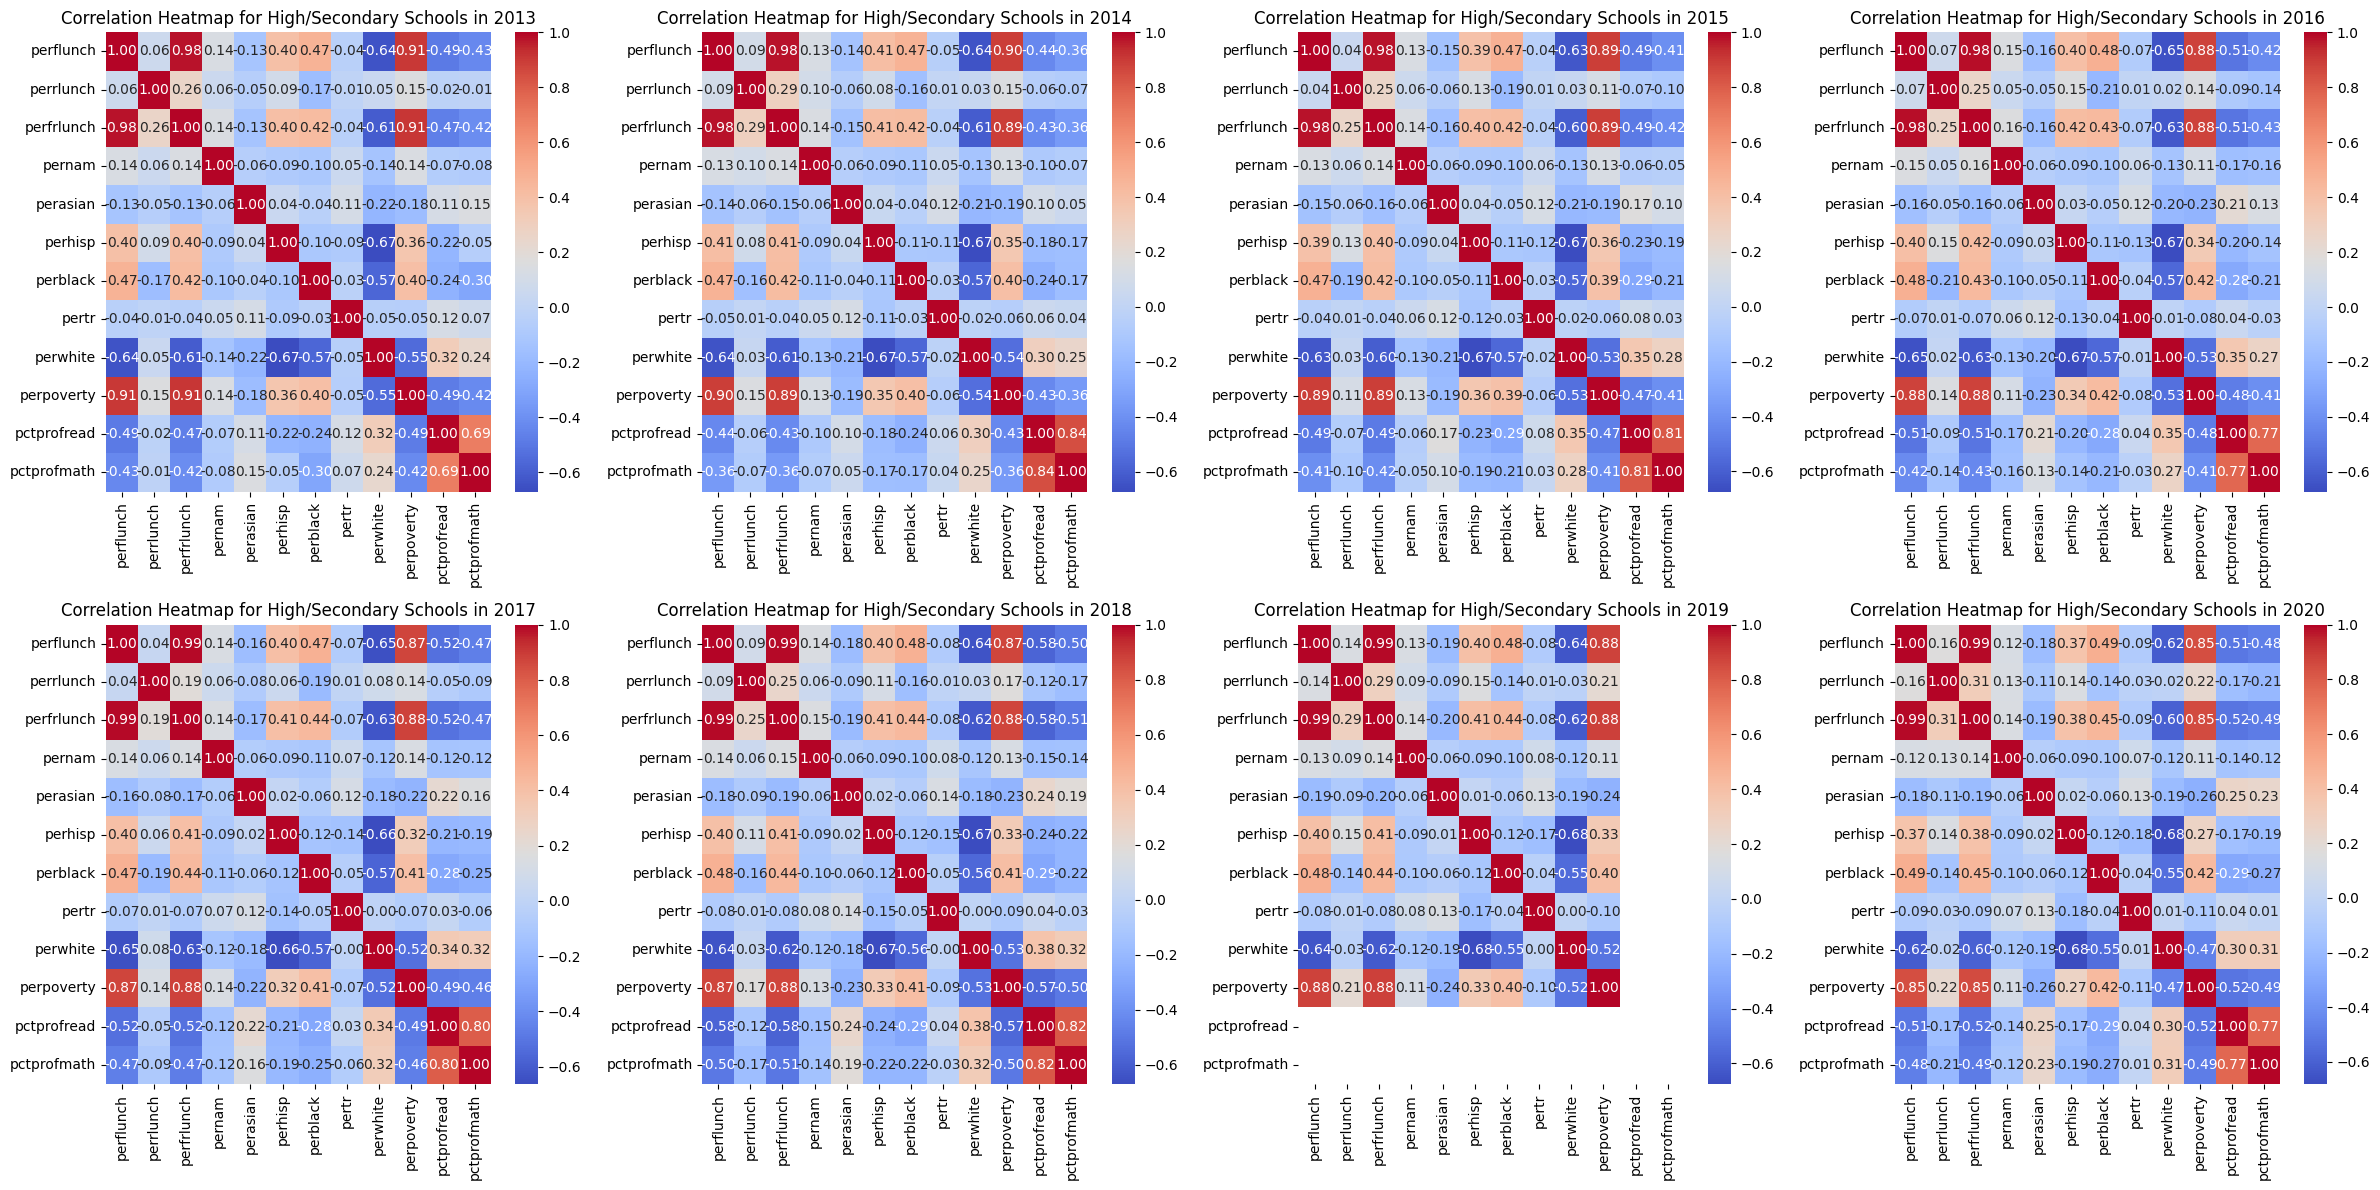

In [24]:
years = range(2013, 2021)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

for i, year in enumerate(years):
    filtered_df = merged_df[(merged_df['level'] == 'High/Secondary') & (merged_df['year'] == year)]
    columns_of_interest = [col for col in filtered_df.columns if col.startswith('per') or col.startswith('pct')]
    corr_matrix = filtered_df[columns_of_interest].corr()
    
    ax = axes[i // 4, i % 4]
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title(f'Correlation Heatmap for High/Secondary Schools in {year}')

plt.tight_layout()
plt.show()

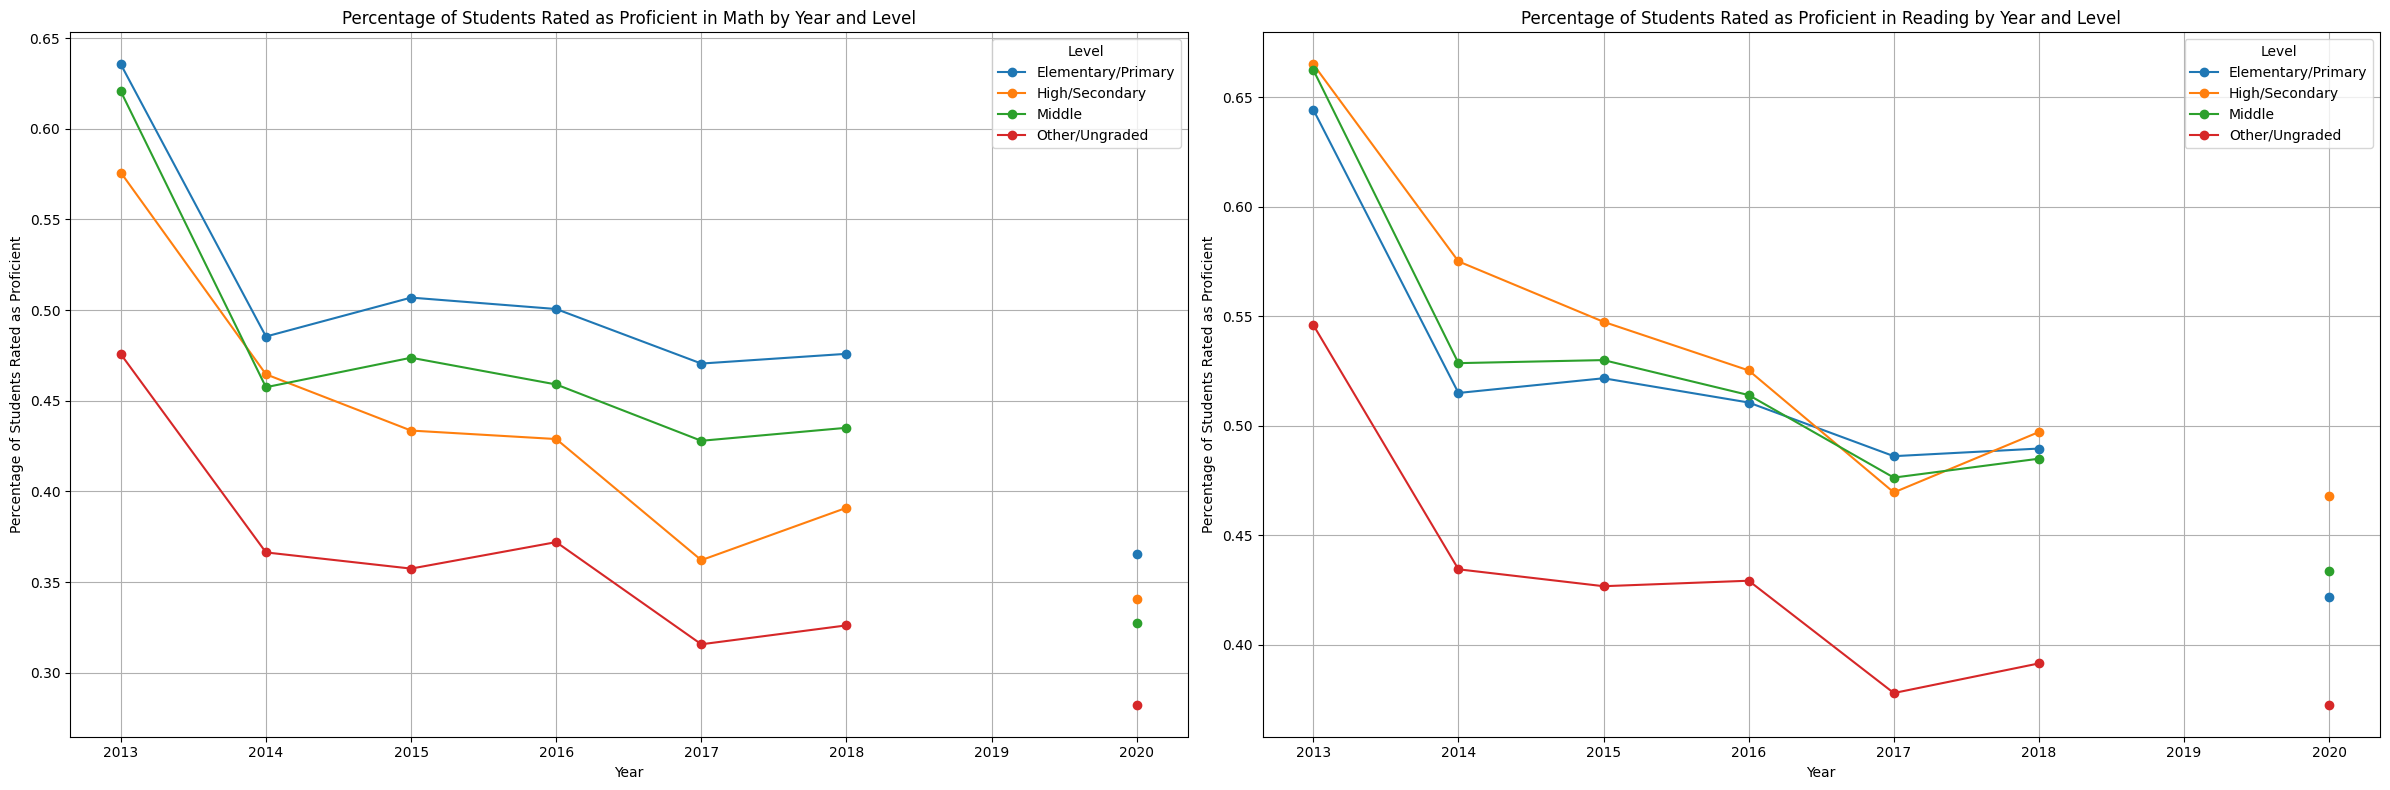

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Group by year and level, then calculate the mean math scores
mean_math_scores = merged_df.groupby(['year', 'level'])['pctprofmath'].mean().unstack()

# Plot the math scores
mean_math_scores.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Percentage of Students Rated as Proficient in Math by Year and Level')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage of Students Rated as Proficient')
axes[0].legend(title='Level')
axes[0].grid(True)

# Group by year and level, then calculate the mean reading scores
mean_reading_scores = merged_df.groupby(['year', 'level'])['pctprofread'].mean().unstack()

# Plot the reading scores
mean_reading_scores.plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('Percentage of Students Rated as Proficient in Reading by Year and Level')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage of Students Rated as Proficient')
axes[1].legend(title='Level')
axes[1].grid(True)

plt.tight_layout()
plt.show()

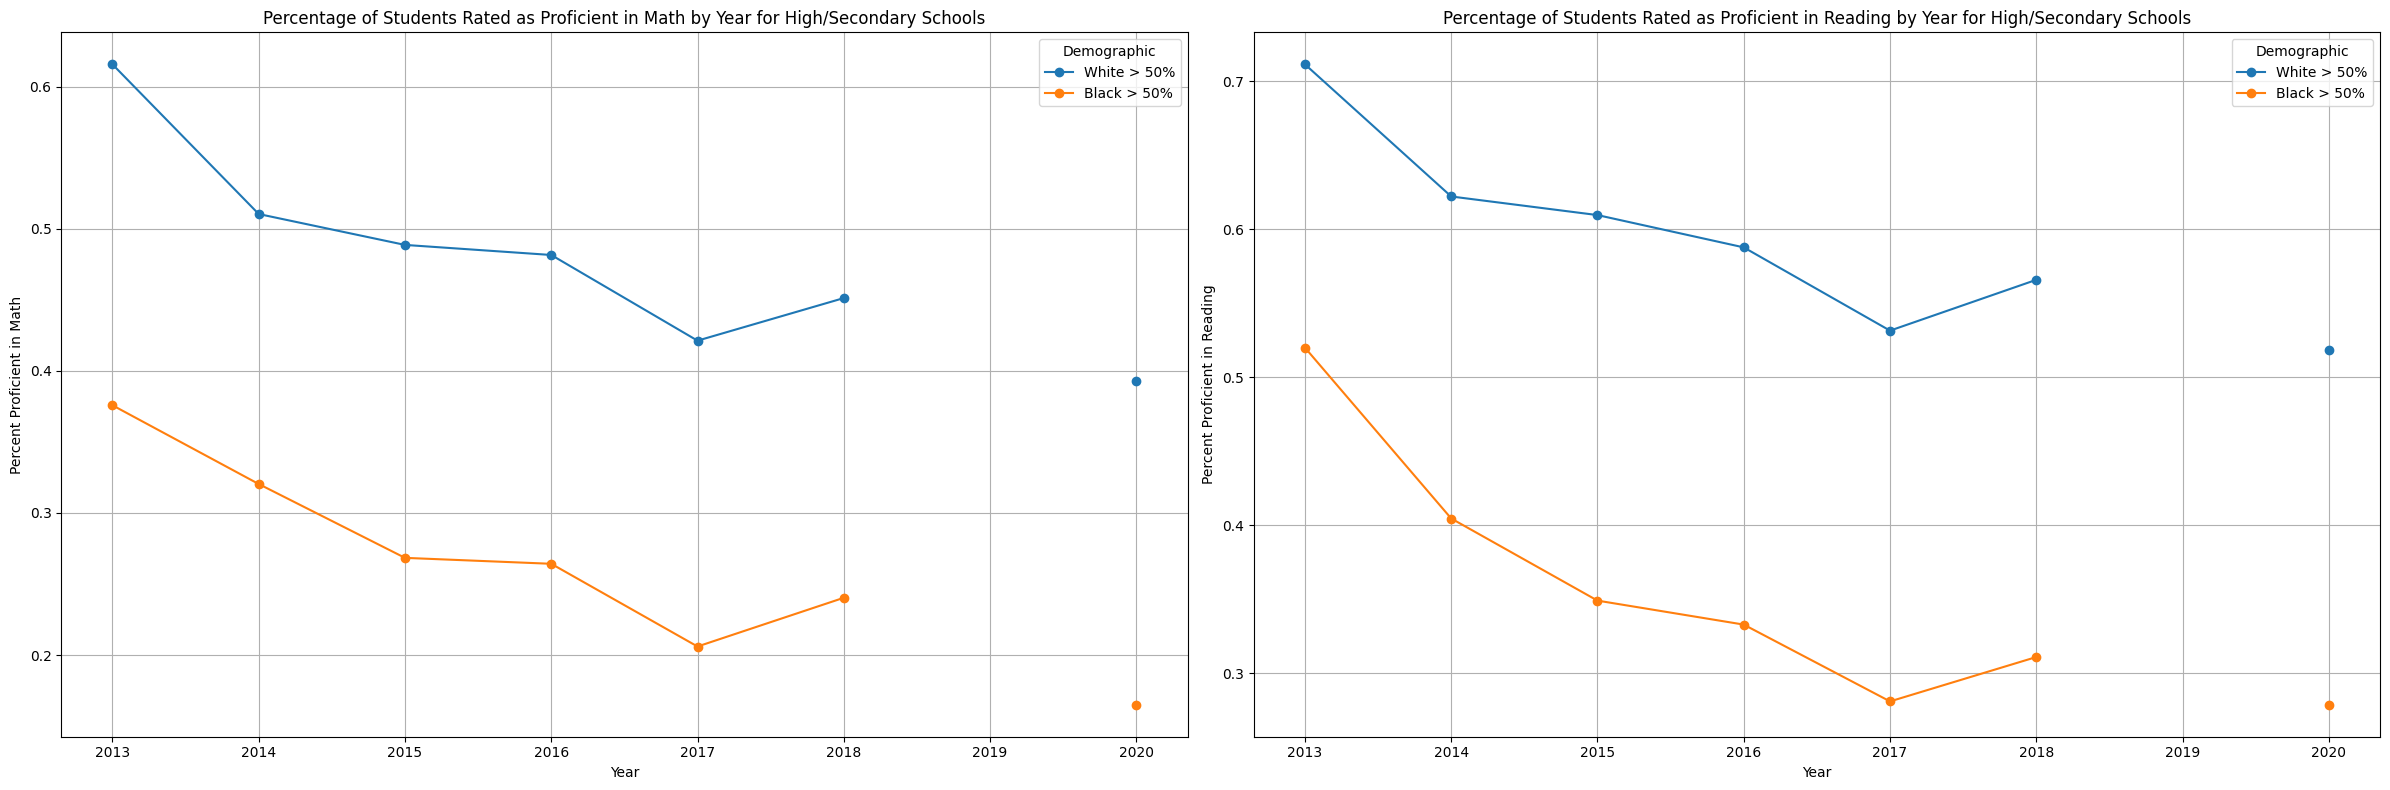

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Filter the dataframe for High/Secondary level schools
high_secondary_df = merged_df[merged_df['level'] == 'High/Secondary']

# Filter for schools where perwhite is greater than 50%
white_schools_df = high_secondary_df[high_secondary_df['perwhite'] > 0.5]

# Group by year and calculate the mean math scores for white schools
mean_math_scores_white = white_schools_df.groupby('year')['pctprofmath'].mean()

# Group by year and calculate the mean reading scores for white schools
mean_reading_scores_white = white_schools_df.groupby('year')['pctprofread'].mean()

# Filter for schools where perblack is greater than 50%
black_schools_df = high_secondary_df[high_secondary_df['perblack'] > 0.5]

# Group by year and calculate the mean math scores for black schools
mean_math_scores_black = black_schools_df.groupby('year')['pctprofmath'].mean()

# Group by year and calculate the mean reading scores for black schools
mean_reading_scores_black = black_schools_df.groupby('year')['pctprofread'].mean()

# Plot the math scores
axes[0].plot(mean_math_scores_white.index, mean_math_scores_white.values, marker='o', label='White > 50%')
axes[0].plot(mean_math_scores_black.index, mean_math_scores_black.values, marker='o', label='Black > 50%')
axes[0].set_title('Percentage of Students Rated as Proficient in Math by Year for High/Secondary Schools')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percent Proficient in Math')
axes[0].legend(title='Demographic')
axes[0].grid(True)

# Plot the reading scores
axes[1].plot(mean_reading_scores_white.index, mean_reading_scores_white.values, marker='o', label='White > 50%')
axes[1].plot(mean_reading_scores_black.index, mean_reading_scores_black.values, marker='o', label='Black > 50%')
axes[1].set_title('Percentage of Students Rated as Proficient in Reading by Year for High/Secondary Schools')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percent Proficient in Reading')
axes[1].legend(title='Demographic')
axes[1].grid(True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_606620/1973292583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['per_black_hisp'] = df_2020['perblack'] + df_2020['perhisp']


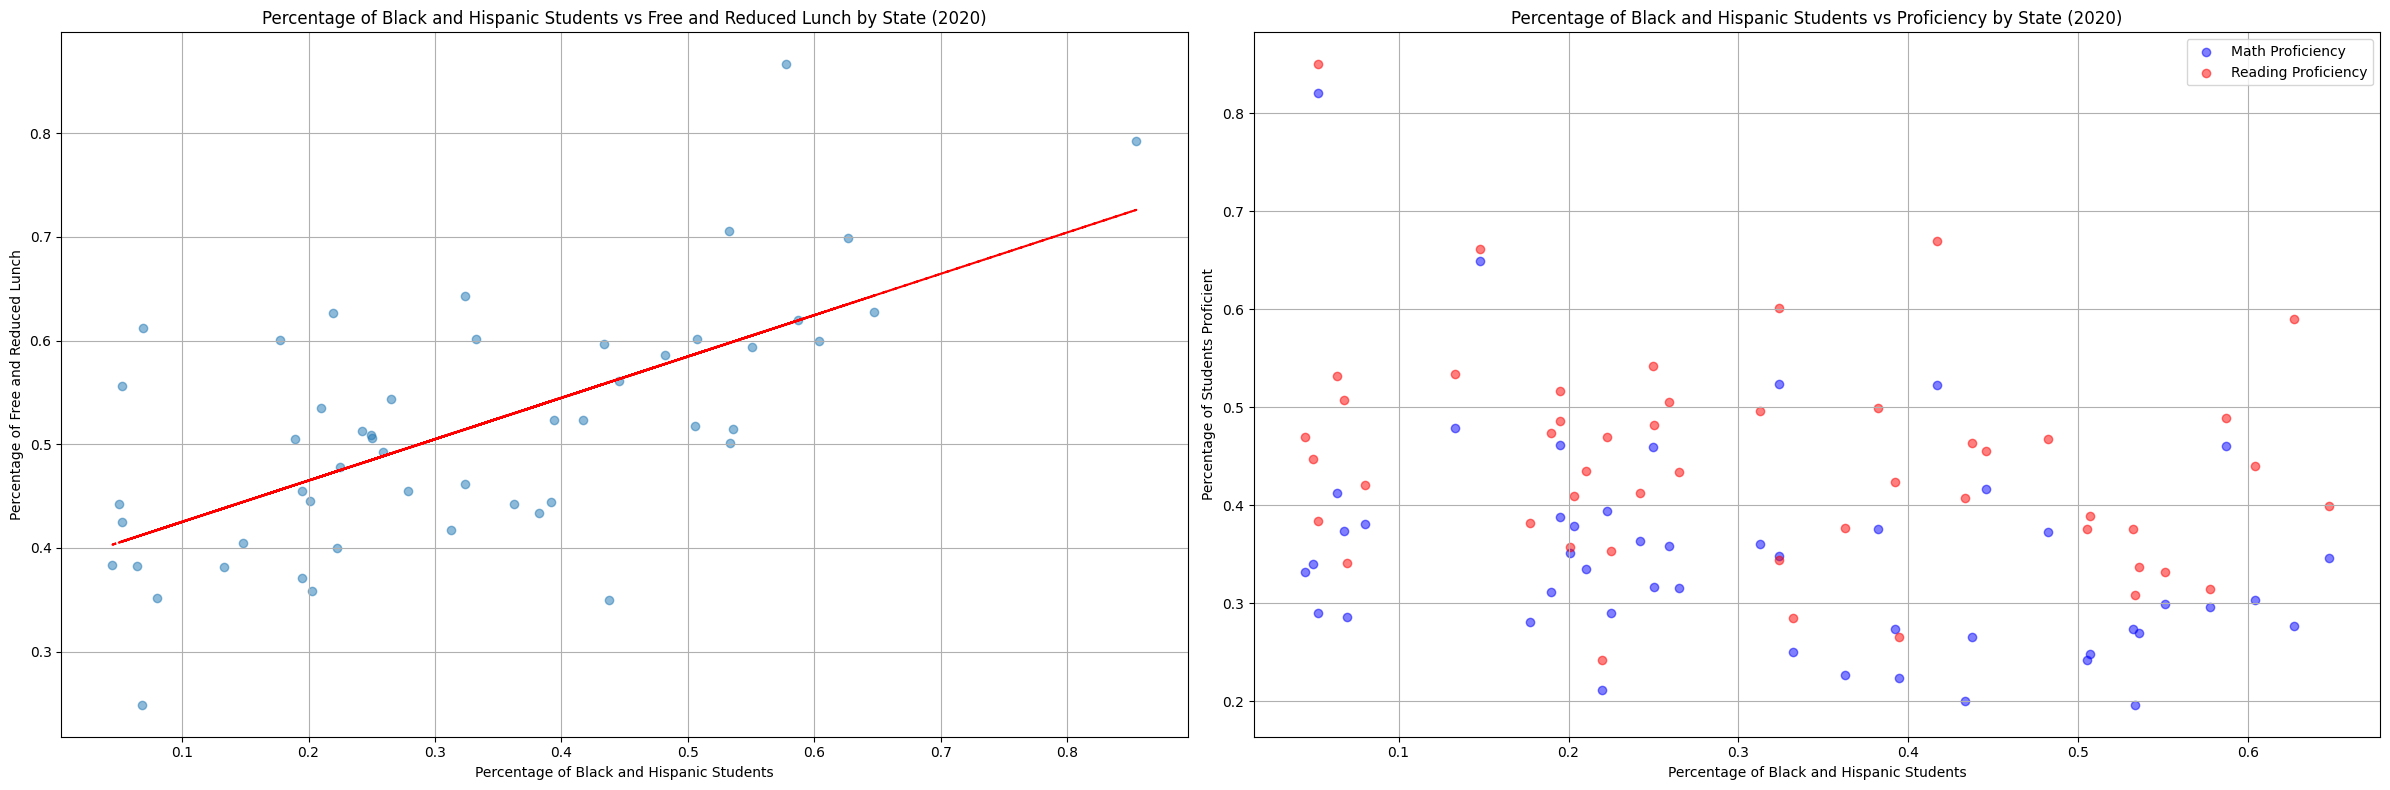

In [ ]:
# Filter the dataframe for the year 2020 and High/Secondary level schools
df_2020 = merged_df[(merged_df['year'] == 2020)]

# Create a new column for the combined percentage of black and hispanic students
df_2020['per_black_hisp'] = df_2020['perblack'] + df_2020['perhisp']

# Group by state and calculate the mean for the relevant columns
state_avg_df = df_2020.groupby('state')[['per_black_hisp', 'perfrlunch', 'pctprofmath', 'pctprofread']].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Plot the first scatter plot
axes[0].scatter(state_avg_df['per_black_hisp'], state_avg_df['perfrlunch'], alpha=0.5)
z1 = np.polyfit(state_avg_df['per_black_hisp'], state_avg_df['perfrlunch'], 1)
p1 = np.poly1d(z1)
axes[0].plot(state_avg_df['per_black_hisp'], p1(state_avg_df['per_black_hisp']), "r--")
axes[0].set_title('Percentage of Black and Hispanic Students vs Free and Reduced Lunch by State (2020)')
axes[0].set_xlabel('Percentage of Black and Hispanic Students')
axes[0].set_ylabel('Percentage of Free and Reduced Lunch')
axes[0].grid(True)

# Plot the second scatter plot for math proficiency
axes[1].scatter(state_avg_df['per_black_hisp'], state_avg_df['pctprofmath'], alpha=0.5, label='Math Proficiency', color='blue')
z2 = np.polyfit(state_avg_df['per_black_hisp'], state_avg_df['pctprofmath'], 1)
p2 = np.poly1d(z2)
axes[1].plot(state_avg_df['per_black_hisp'], p2(state_avg_df['per_black_hisp']), "b--")

# Plot the second scatter plot for reading proficiency
axes[1].scatter(state_avg_df['per_black_hisp'], state_avg_df['pctprofread'], alpha=0.5, color='red', label='Reading Proficiency')
z3 = np.polyfit(state_avg_df['per_black_hisp'], state_avg_df['pctprofread'], 1)
p3 = np.poly1d(z3)
axes[1].plot(state_avg_df['per_black_hisp'], p3(state_avg_df['per_black_hisp']), "r--")

axes[1].set_title('Percentage of Black and Hispanic Students vs Proficiency by State (2020)')
axes[1].set_xlabel('Percentage of Black and Hispanic Students')
axes[1].set_ylabel('Percentage of Students Proficient')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()